In [1]:
# # # import pandas as pd
# # # from sklearn.feature_extraction.text import TfidfVectorizer
# # # from sklearn.decomposition import TruncatedSVD
# # # from sklearn.cluster import KMeans
# # # from sklearn.model_selection import train_test_split
# # # from sklearn.metrics import accuracy_score
# # # from sklearn.pipeline import Pipeline
# # # from nltk.corpus import stopwords
# # # from nltk.stem import PorterStemmer
# # # from sklearn.preprocessing import LabelEncoder
# # # from sklearn.linear_model import LogisticRegression

# # # # Load data
# # # data = pd.read_csv('suicide.csv')

# # # # Preprocessing
# # # stop_words = set(stopwords.words('english'))
# # # stemmer = PorterStemmer()

# # # def preprocess_text(text):
# # #     text = text.lower()
# # #     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
# # #     text = ' '.join([stemmer.stem(word) for word in text.split()])
# # #     return text

# # # data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # # # Feature extraction
# # # tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# # # tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text'])

# # # # Dimensionality reduction
# # # svd = TruncatedSVD(n_components=100)
# # # svd_matrix = svd.fit_transform(tfidf_matrix)

# # # # Clustering
# # # kmeans = KMeans(n_clusters=2, random_state=42)
# # # kmeans.fit(svd_matrix)

# # # # Assign cluster labels
# # # data['cluster_label'] = kmeans.labels_

# # # # Split data into train and test sets
# # # X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # # # Train classifier
# # # classifier = LogisticRegression()
# # # classifier.fit(X_train, y_train)

# # # # Predictions
# # # y_pred = classifier.predict(X_test)

# # # # Evaluate classifier
# # # accuracy = accuracy_score(y_test, y_pred)
# # # print("Accuracy:", accuracy)

# # import pandas as pd
# # from sklearn.feature_extraction.text import CountVectorizer
# # from sklearn.decomposition import TruncatedSVD
# # from sklearn.cluster import KMeans
# # from sklearn.model_selection import train_test_split
# # from sklearn.metrics import accuracy_score
# # from sklearn.pipeline import Pipeline
# # from nltk.corpus import stopwords
# # from nltk.stem import PorterStemmer
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.linear_model import LogisticRegression

# # Load data
# data = pd.read_csv('suicide.csv')

# # Preprocessing
# stop_words = set(stopwords.words('english'))
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     text = text.lower()
#     text = ' '.join([word for word in text.split() if word.isalpha() and word not in stop_words])
#     text = ' '.join([stemmer.stem(word) for word in text.split()])
#     return text

# data['clean_text'] = data['Tweet'].apply(preprocess_text)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['clean_text'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(svd_matrix, data['label'], test_size=0.2, random_state=42)

# # Train classifier
# classifier = LogisticRegression()
# classifier.fit(X_train, y_train)

# # Predictions
# y_pred = classifier.predict(X_test)

# # Evaluate classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)


# import pandas as pd
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import TruncatedSVD
# from sklearn.cluster import KMeans

# # Load data
# data = pd.read_csv('suicide.csv')

# # Drop rows with missing values in the 'Tweet' column
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction
# svd = TruncatedSVD(n_components=100)
# svd_matrix = svd.fit_transform(bow_matrix)

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(svd_matrix)

# # Assign cluster labels
# data['cluster_label'] = kmeans.labels_

# # Evaluate clustering results (compare with Suicide labels)
# # Implement your evaluation steps here

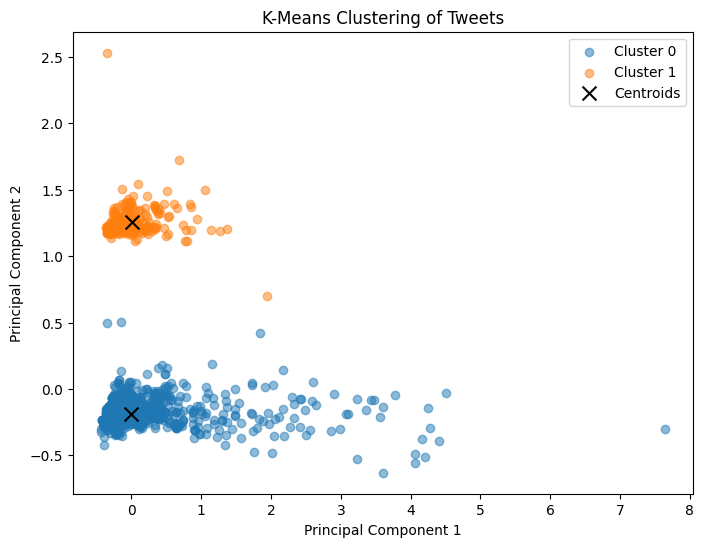

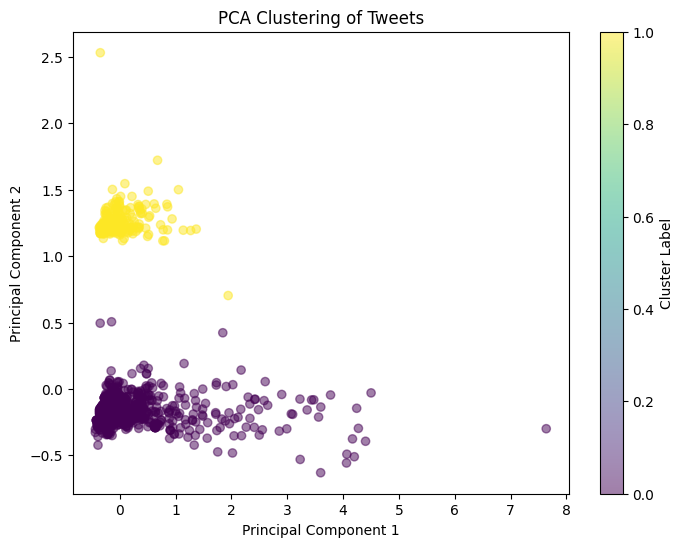

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)


# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters
plt.figure(figsize=(8, 6))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
# 
plt.title('K-Means Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

Text: making lunch | Sentiment: Positive
Text: alexia want money | Sentiment: Positive
Text: dizzyhrvy crap took forever put together going go sleep days | Sentiment: Positive
Text: jnaylor kiwitweets hey jer since start twittering | Sentiment: Positive
Text: trying quot delicious library quot mixed results bar code thought wanted add sport bra instead drill cool app tho | Sentiment: Positive
Text: valenvaldez oh good hear already continue holy week | Sentiment: Positive
Text: got list fellow hotties gon na share one amigo | Sentiment: Positive
Text: jakepaul jamescharles loganpaul shane made series doesnt mean people take seriously https co | Sentiment: Positive
Text: time warsaw beer garden chilling | Sentiment: Positive
Text: hate life lmao hope die soon sumn tired everything | Sentiment: Positive
Text: everything lover survival everything mother survival | Sentiment: Positive
Text: stray cat campus looks like garfield students always feeding fat like | Sentiment: Positive
Text: go 

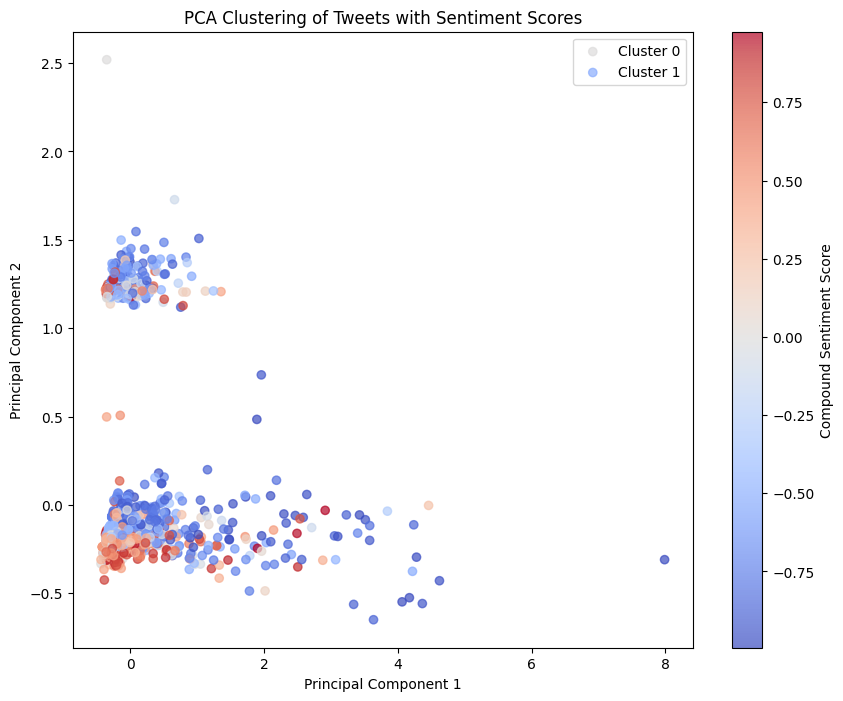

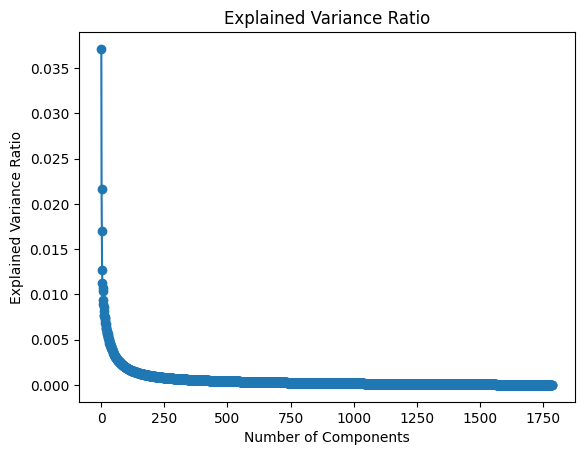

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing values in the 'Tweet' column
data.dropna(subset=['Tweet'], inplace=True)

texts = data['Tweet'].tolist()

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each tweet
data['compound_score'] = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering with K-means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)

# Assign cluster labels
data['cluster_label'] = kmeans.labels_

# Plotting the clusters with sentiment scores
plt.figure(figsize=(10, 8))

# Plot each cluster separately
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                c=data[data['cluster_label'] == cluster_label]['compound_score'], 
                cmap='coolwarm', alpha=0.7, label=f'Cluster {cluster_label}')

labels = kmeans.labels_
sentiment_labels = ['Positive' if label <= 0.5 else 'Negative' for label in labels]

# Output sentiment labels for each text
for i, text in enumerate(texts):
    print(f"Text: {text} | Sentiment: {sentiment_labels[i]}")

plt.title('PCA Clustering of Tweets with Sentiment Scores')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Compound Sentiment Score')
plt.legend()
plt.show()

pca = PCA()
pca.fit(bow_matrix.toarray())
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio')
plt.show()

In [5]:
# # Step 1: Preprocessing the Data
# import pandas as pd
# import re
# from nltk.tokenize import word_tokenize
# import matplotlib.pyplot as plt
# from sklearn.decomposition import PCA

# data = pd.read_csv('suicide.csv')

# def clean_text(text):
#     try:
#         if pd.isna(text):  # Check if text is NaN
#             return ''
#         text = re.sub(r'http\S+', '', text)  # Remove URLs
#         text = re.sub(r'@\w+', '', text)     # Remove mentions
#         text = re.sub(r'&\w+;', '', text)    # Remove HTML entities
#         text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
#         text = text.lower()                  # Convert to lowercase
#         return text
#     except Exception as e:
#         print(f"Error cleaning text: {e}, Text: {text}")
#         return ''  # Return empty string if cleaning fails

# data['cleaned_text'] = data['Tweet'].apply(clean_text)
# data.head()

# # Step 2: Feature Extraction using Bag of Words (BoW)
# from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# X_bow = vectorizer.fit_transform(data['cleaned_text'])

# # Step 3: Sentiment Analysis using VADER
# from nltk.sentiment.vader import SentimentIntensityAnalyzer

# sid = SentimentIntensityAnalyzer()

# def vader_sentiment(text):
#     scores = sid.polarity_scores(text)
#     return scores['compound']

# data['sentiment_score'] = data['cleaned_text'].apply(vader_sentiment)

# # Step 4: Dimensionality Reduction
# from sklearn.decomposition import TruncatedSVD

# svd = TruncatedSVD(n_components=100)
# X_svd = svd.fit_transform(X_bow)

# # Step 5: Clustering
# from sklearn.cluster import KMeans

# kmeans = KMeans(n_clusters=2)
# kmeans.fit(X_svd)
# data['cluster'] = kmeans.labels_

# # Step 4: Dimensionality Reduction with PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_bow)

# # Plot PCA
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['cluster'], cmap='viridis', alpha=0.5)
# plt.title('PCA Visualization')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.show()

# # Step 5: Plot KMeans Clustering
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.5)
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
# plt.title('KMeans Clustering')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.colorbar(label='Cluster')
# plt.legend()
# plt.show()

# # Step 6: Labeling
# # You might label clusters based on manual inspection or domain knowledge

# # Step 7: Evaluation
# # Evaluate the clustering algorithm using metrics like silhouette score or purity

# # Step 8: Deployment (Optional)
# # Deploy the model or pipeline to predict whether new tweets are potential suicide posts or not


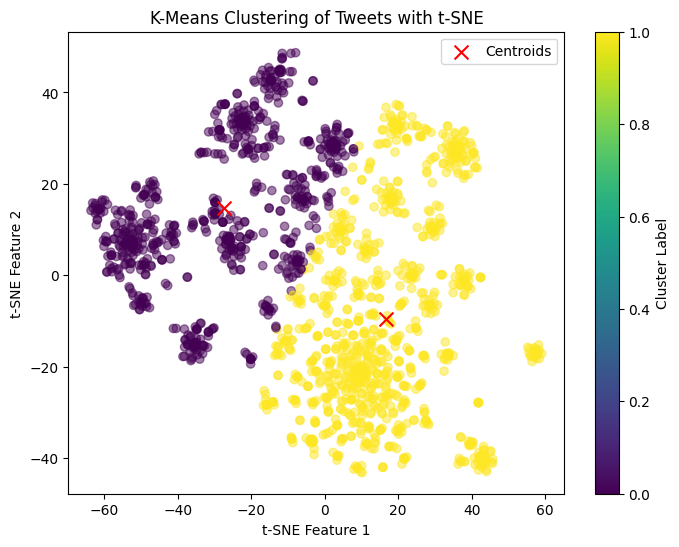

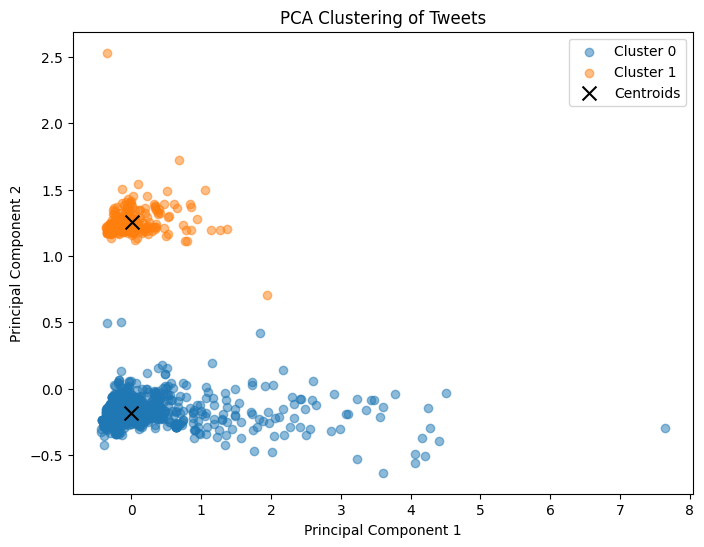

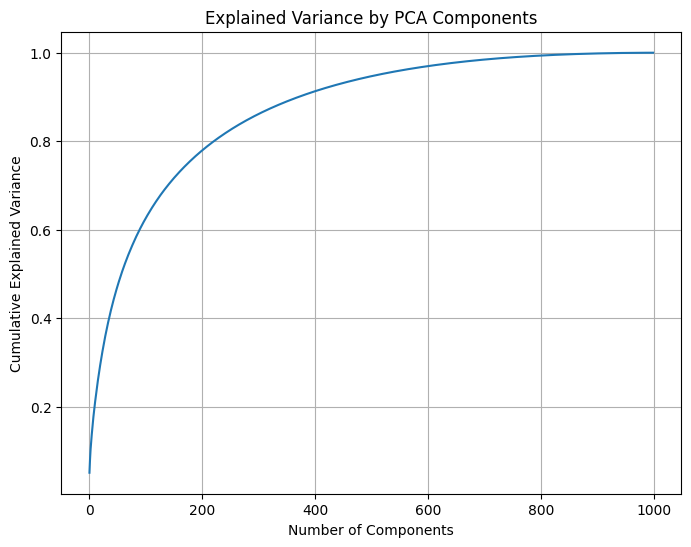

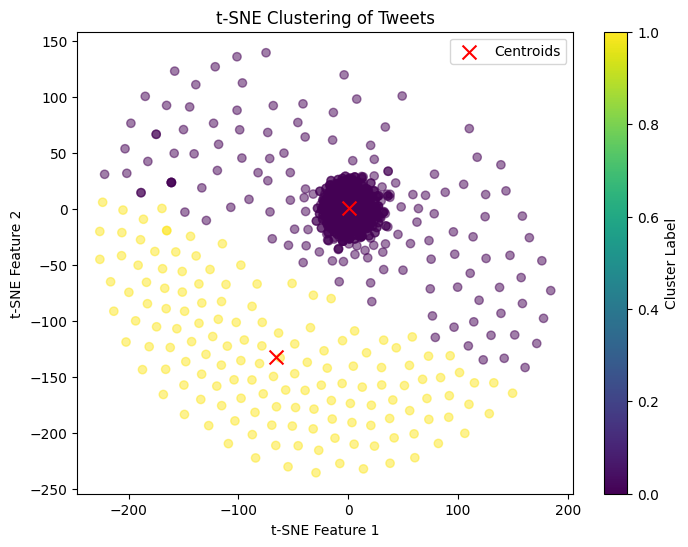

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


# Load data
data = pd.read_csv('suicide.csv')


# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())


# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)


# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)


# Plotting
plt.figure(figsize=(8, 6))


# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)


# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')


# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


# Assuming 'data' is your DataFrame with the 'Tweet' column available


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())




# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)
data['cluster_label'] = kmeans.labels_


# PCA Clustering Plot
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0],
                pca_matrix[data['cluster_label'] == cluster_label, 1],
                label=f'Cluster {cluster_label}', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Explained Variance Plot
pca_full = PCA().fit(bow_matrix.toarray())
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()




# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)


# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())


# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_


# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()



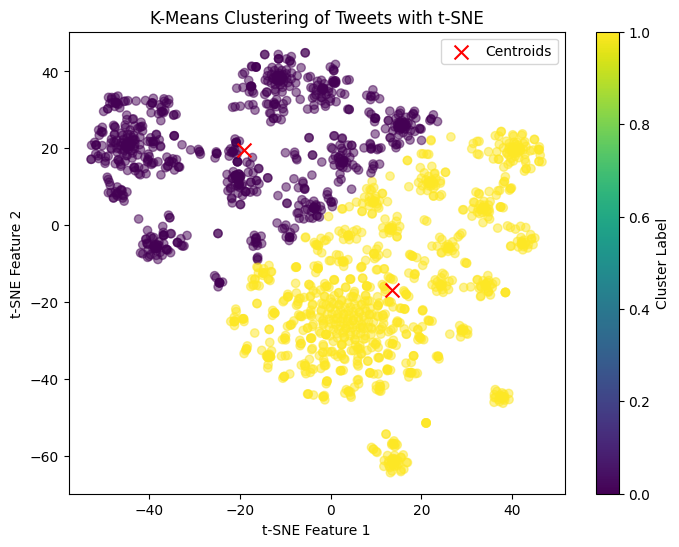

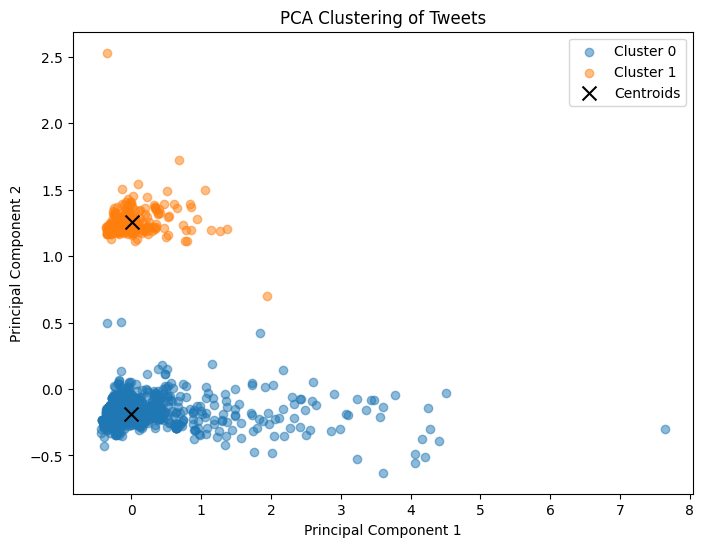

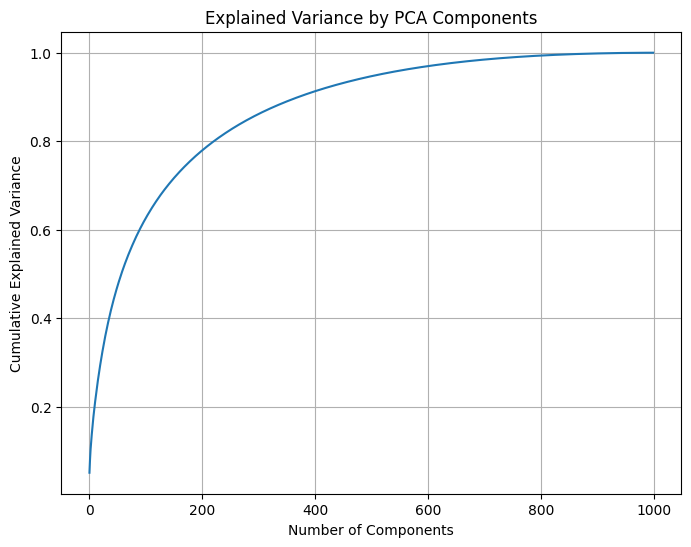

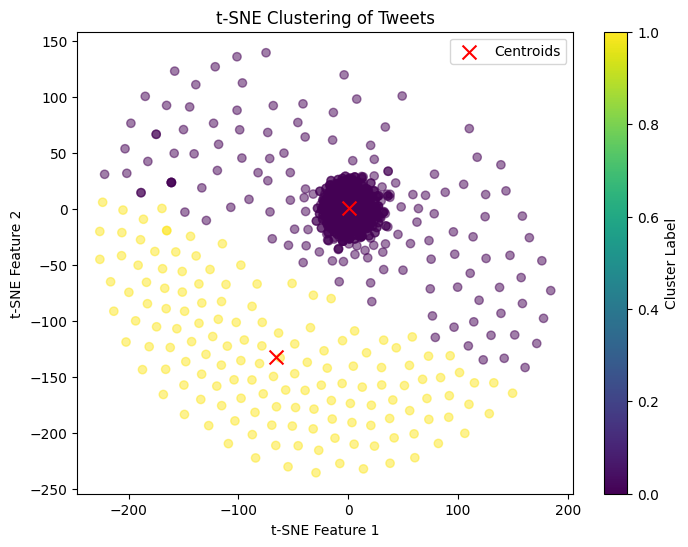

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

data

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame with the 'Tweet' column available

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(pca_matrix)
data['cluster_label'] = kmeans.labels_

# PCA Clustering Plot
plt.figure(figsize=(8, 6))
for cluster_label in range(2):
    plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
                pca_matrix[data['cluster_label'] == cluster_label, 1], 
                label=f'Cluster {cluster_label}', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
plt.title('PCA Clustering of Tweets')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Explained Variance Plot
pca_full = PCA().fit(bow_matrix.toarray())
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()



# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

In [5]:
pip install vaderSentiment 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 958.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


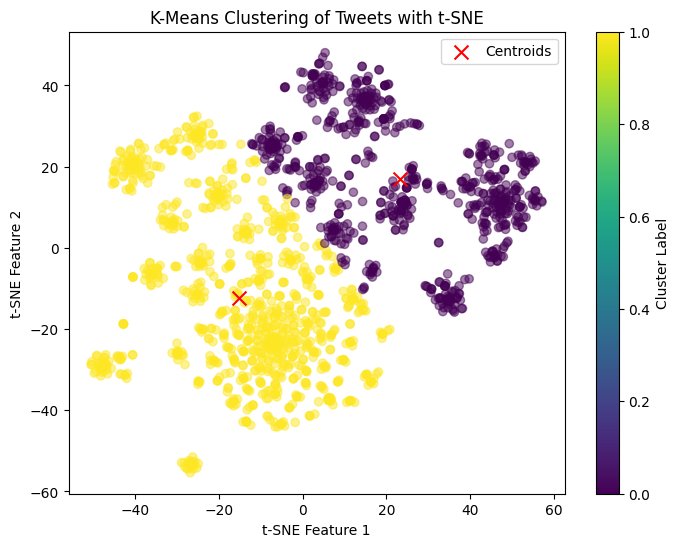

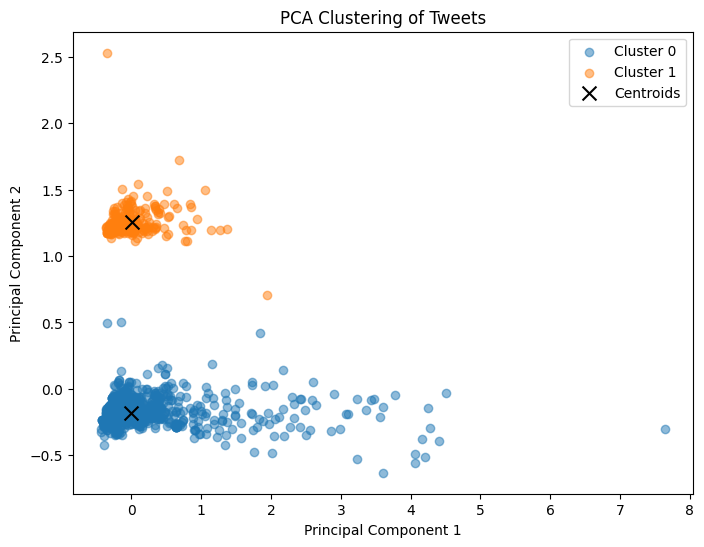

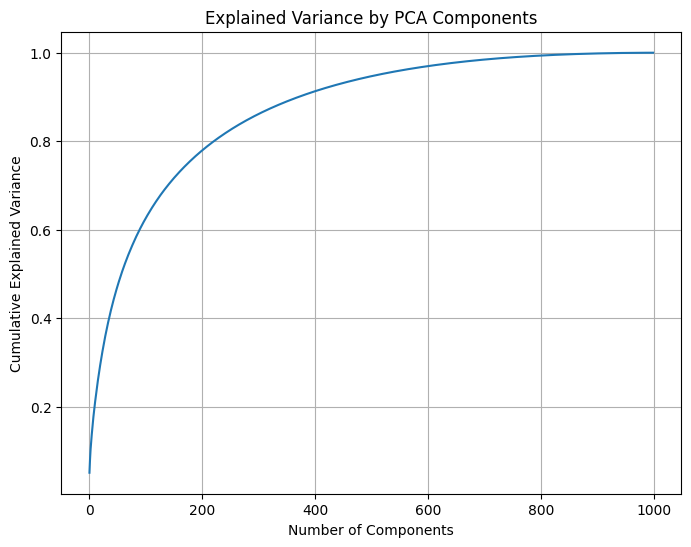

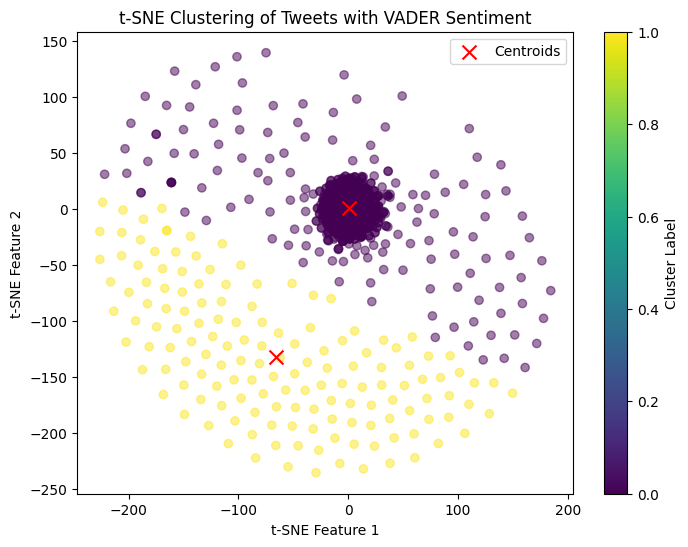

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

data

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Initial dimensionality reduction with PCA
pca = PCA(n_components=50)  # Reduce to 50 dimensions for t-SNE efficiency
pca_matrix = pca.fit_transform(bow_matrix.toarray())

# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()




In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# from sklearn.cluster import KMeans
# from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# # Assuming 'data' is your DataFrame with the 'Tweet' column available

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer(max_features=1000)
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # Dimensionality reduction with PCA
# pca = PCA(n_components=2)
# pca_matrix = pca.fit_transform(bow_matrix.toarray())

# # Clustering
# kmeans = KMeans(n_clusters=2, random_state=42)
# kmeans.fit(pca_matrix)
# data['cluster_label'] = kmeans.labels_

# # PCA Clustering Plot
# plt.figure(figsize=(8, 6))
# for cluster_label in range(2):
#     plt.scatter(pca_matrix[data['cluster_label'] == cluster_label, 0], 
#                 pca_matrix[data['cluster_label'] == cluster_label, 1], 
#                 label=f'Cluster {cluster_label}', alpha=0.5)
# centroids = kmeans.cluster_centers_
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='black', label='Centroids')
# plt.title('PCA Clustering of Tweets')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend()
# plt.show()

# # Explained Variance Plot
# pca_full = PCA().fit(bow_matrix.toarray())
# plt.figure(figsize=(8, 6))
# plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.title('Explained Variance by PCA Components')
# plt.grid(True)
# plt.show()



# # Drop rows with missing 'Tweet'
# data.dropna(subset=['Tweet'], inplace=True)

# # Feature extraction (Bag of Words)
# count_vectorizer = CountVectorizer()
# bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# # t-SNE for dimensionality reduction
# tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
# tsne_results = tsne.fit_transform(bow_matrix.toarray())


# # Initialize VADER
# analyzer = SentimentIntensityAnalyzer()

# # Calculate VADER sentiment scores for each tweet
# vader_scores = data['Tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# # Concatenate VADER scores with t-SNE results
# combined_features = np.column_stack((tsne_results, vader_scores))

# # Clustering with KMeans on combined features
# kmeans_vader_tsne = KMeans(n_clusters=2, random_state=42)
# kmeans_vader_tsne.fit(combined_features)
# data['cluster_label_vader_tsne'] = kmeans_vader_tsne.labels_

# # Plotting
# plt.figure(figsize=(8, 6))
# plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label_vader_tsne'], cmap='viridis', alpha=0.5)
# centroids = kmeans_vader_tsne.cluster_centers_[:, :2]  # Consider only the t-SNE coordinates for centroids
# plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
# plt.title('t-SNE Clustering of Tweets with VADER Sentiment')
# plt.xlabel('t-SNE Feature 1')
# plt.ylabel('t-SNE Feature 2')
# plt.colorbar(label='Cluster Label')
# plt.legend()
# plt.show()


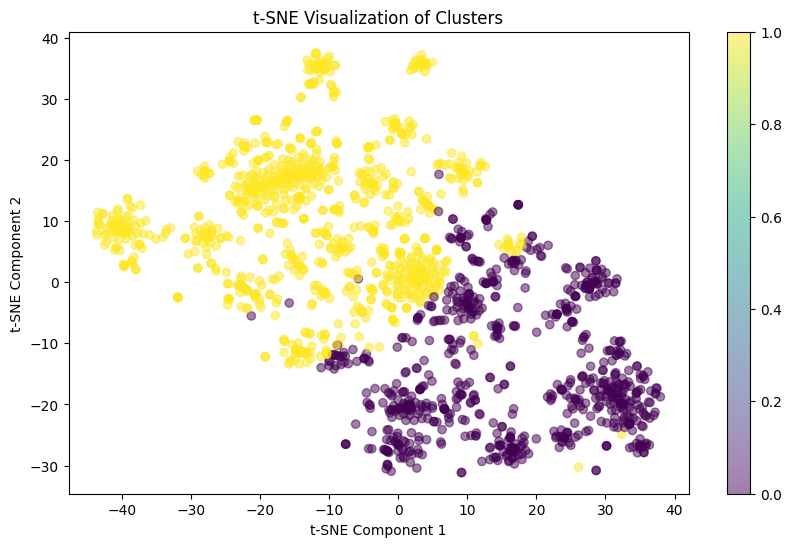

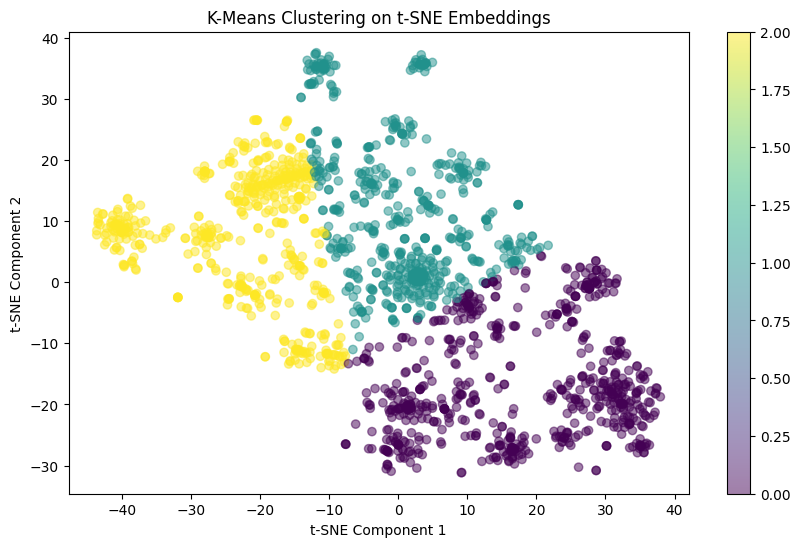

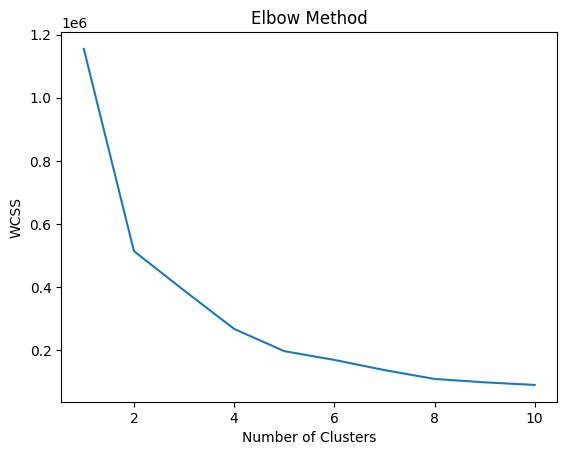

In [22]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the data
data = pd.read_csv('suicide.csv')

# Handling NaN values
data['Tweet'].fillna('', inplace=True)

# Preprocess the data
# Assuming 'Tweet' column contains the tweet text and 'Suicide' column contains labels
X = data['Tweet']
y = data['Suicide']

# Bag of Words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Sentiment Analysis with VADER
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(tweet)['compound'] for tweet in X]

# Combine Bag of Words representation and sentiment scores
X_combined = pd.concat([pd.DataFrame(X_bow.toarray()), pd.DataFrame(sentiments, columns=['Sentiment'])], axis=1)

# Convert feature names to strings
X_combined.columns = X_combined.columns.astype(str)

# # Dimensionality Reduction with PCA
pca = PCA(n_components=50)  # You may need to adjust the number of components
X_pca = pca.fit_transform(X_combined)

# Dimensionality Reduction with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  
X_tsne = tsne.fit_transform(X_pca)

# Clustering with K-Means
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming 2 clusters: potential suicide vs not suicide
labels = kmeans.fit_predict(X_tsne)

# Splitting data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tsne, y, test_size=0.2, random_state=42)

import matplotlib.pyplot as plt

# pca = PCA().fit(X_combined)
# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of Components')
# plt.ylabel('Cumulative Explained Variance')
# plt.show()

perplexities = [5, 10, 20, 30, 50]
for perp in perplexities:
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X_pca)
    # Visualize clusters using X_tsne

    # Assuming labels contain the cluster assignments from K-Means clustering
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.show()

# Assuming X_tsne contains the t-SNE embeddings
kmeans = KMeans(n_clusters=3, random_state=42)  # You can adjust the number of clusters
labels = kmeans.fit_predict(X_tsne)

# Visualize clusters using scatter plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar()
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('K-Means Clustering on t-SNE Embeddings')
plt.show()

# Assuming X_tsne contains the t-SNE embeddings
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
    


In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('suicide.csv')

# Preprocessing
data['Suicide'] = data['Suicide'].apply(lambda x: 1 if x == 'Potential Suicide post' else 0)

# Feature extraction using Bag of Words
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Tweet'])

# Sentiment Analysis using VADER
sid = SentimentIntensityAnalyzer()
sentiments = data['Tweet'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())

# Clustering using k-means
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Evaluation
data['Cluster'] = clusters
accuracy = np.mean(data['Cluster'] == data['Suicide'])
print("Accuracy:", accuracy)

# Visualization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Suicide'], cmap='viridis')
plt.title('t-SNE Visualization of Suicide Tweets')
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cluster'], cmap='viridis')
plt.title('t-SNE Visualization of Clusters')
plt.show()



ValueError: np.nan is an invalid document, expected byte or unicode string.

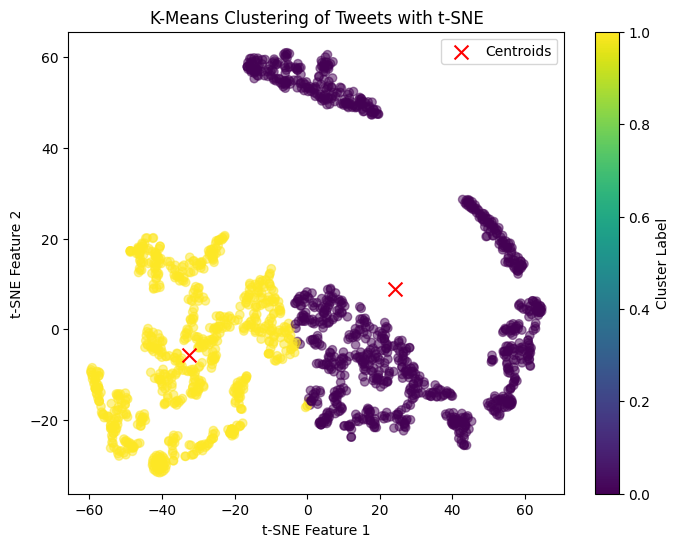

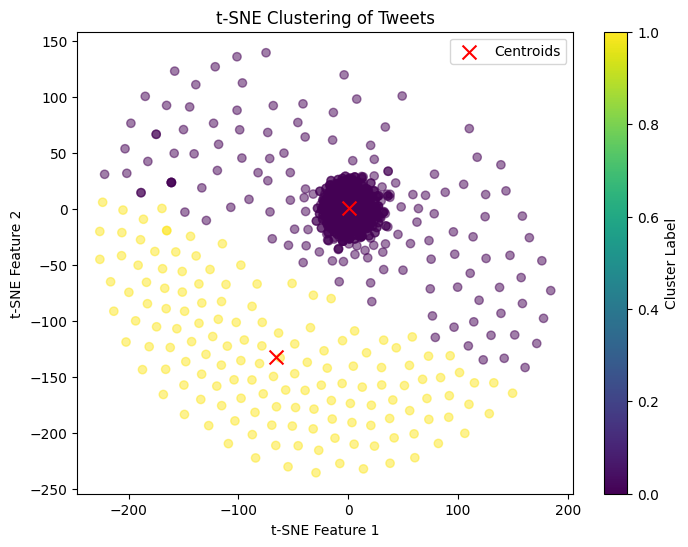

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])


# Further dimensionality reduction and visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
tsne_matrix = tsne.fit_transform(pca_matrix)

# Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
data['cluster_label'] = kmeans.fit_predict(tsne_matrix)

# Plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the clusters
plt.scatter(tsne_matrix[:, 0], tsne_matrix[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)

# Plot centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')

# Plot details
plt.title('K-Means Clustering of Tweets with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Assuming 'data' is your DataFrame with the 'Tweet' column available

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer(max_features=1000)
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# Drop rows with missing 'Tweet'
data.dropna(subset=['Tweet'], inplace=True)

# Feature extraction (Bag of Words)
count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(data['Tweet'])

# t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=3000, random_state=42)
tsne_results = tsne.fit_transform(bow_matrix.toarray())

# Clustering with KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(tsne_results)
data['cluster_label'] = kmeans.labels_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=data['cluster_label'], cmap='viridis', alpha=0.5)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, c='red', label='Centroids')
plt.title('t-SNE Clustering of Tweets')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

In [26]:
df = pd.read_csv('suicide.csv')

# Drop rows with missing 'Tweet'
df.dropna(subset=['Tweet'], inplace=True)
# Step 3: Feature Extraction
# Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['Tweet'])

# VADER Sentiment
sia = SentimentIntensityAnalyzer()
sentiment_scores = df['Tweet'].apply(lambda tweet: sia.polarity_scores(tweet))
sentiment_df = pd.DataFrame(list(sentiment_scores))

# Combine features
X_combined = hstack([X_bow, np.array(sentiment_df)])

# Step 4: t-SNE for Dimensionality Reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_combined.toarray())

# Step 5: k-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_tsne)

# Step 6: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.7)
plt.title('t-SNE visualization of tweet clusters')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

NameError: name 'hstack' is not defined

In [28]:
df = pd.DataFrame("suicide.csv")

# Step 1: Bag of Words (BoW) representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['text'])

# Step 2: Dimensionality Reduction (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bow.toarray())

# Step 3: Sentiment Analysis with VADER
sia = SentimentIntensityAnalyzer()
sentiments = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Step 4: Clustering (K-means)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca)

# Step 5: Combine features for clustering
X_combined = np.column_stack((X_pca, sentiments))

# Step 6: Clustering with combined features
kmeans_combined = KMeans(n_clusters=2)
kmeans_combined.fit(X_combined)

# Step 7: Print cluster results
df['cluster'] = kmeans.labels_
df['combined_cluster'] = kmeans_combined.labels_

print("Clustering Results:")
print(df[['text', 'cluster']])
print("\nClustering Results with Combined Features:")
print(df[['text', 'combined_cluster']])

ValueError: DataFrame constructor not properly called!